In [1]:
#Figure of timeserie - Jan 2022
import datetime as dt
import glob
import netCDF4 as nc
import numpy as np
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cmocean
import gsw

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config["data_dir"] = './cartopy_shapefiles'

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels

os.getcwd()
pathMon = '/home/datawork-lops-bluecloud/osnet/product_out/OSnet/clean/'
pathOS = '/home/datawork-lops-bluecloud/osnet/'
pathfig = '/home1/datawork/epauthen/Fig_Product/Figure_clean/'

In [2]:
#Load timeserie of SST, SSS, ARMOR 3D anf GLORYS
path = '/home/datawork-lops-bluecloud/osnet/timeserie/'
armor = xr.load_dataset(path + 'ARMOR3D.nc')
surf = xr.load_dataset(path + 'SST_SSS.nc')
glorys = xr.load_dataset(path + 'GLORYS_full.nc')
osnet = xr.load_dataset(path + 'OSnet_full.nc')
osnet

<xarray.Dataset>
Dimensions:     (time: 9861)
Coordinates:
  * time        (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
Data variables: (12/20)
    to_ts       (time) float32 19.6 19.57 19.55 19.48 ... 20.24 20.19 20.14
    to_trend    (time) float64 21.23 21.23 21.23 21.23 ... 21.93 21.93 21.93
    to_season   (time) float64 -1.652 -1.685 -1.721 ... -1.707 -1.762 -1.828
    to_resid    (time) float64 0.02347 0.02931 0.03895 ... 0.01967 0.03171
    so_ts       (time) float32 36.37 36.37 36.37 36.37 ... 36.39 36.38 36.38
    so_trend    (time) float64 36.33 36.33 36.33 36.33 ... 36.38 36.38 36.38
    ...          ...
    sCI_season  (time) float64 -0.002745 -0.002797 ... -0.00305 -0.002989
    sCI_resid   (time) float64 0.000645 0.0005791 ... -0.0005556 -0.0006118
    mld_ts      (time) float32 98.58 99.34 100.1 101.7 ... 95.92 96.95 98.4
    mld_trend   (time) float64 65.13 65.12 65.12 65.12 ... 63.94 63.94 63.93
    mld_season  (time) float64 33.47 34.41 35.31 36.66 ... 31.38 32.44 33.85
    mld_resid   (time) float64 -0.0235 -0.1992 -0.3495 ... 0.5978 0.567 0.6154

In [3]:
#Set up time shit
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates

#Seasonal plot#
path_ds = '/home/datawork-lops-bluecloud/osnet/data_remote_sensing/Gridded_input_9319.nc'
ds = xr.open_dataset(f"{path_ds}")

day = np.array(pd.DatetimeIndex(ds['time'].data).dayofyear).astype(np.int32)
ds = ds.assign(variables={"dayOfYear": (('time'), day)})
d = 1/365
cos_week = np.cos(np.pi*2*d*ds['dayOfYear'].data)
sin_week = np.sin(np.pi*2*d*ds['dayOfYear'].data)
ds = ds.assign(variables={"cos_week": (('time'), cos_week)})
ds = ds.assign(variables={"sin_week": (('time'), sin_week)})

day = np.array(pd.DatetimeIndex(armor['time'].data).dayofyear).astype(np.int32)
armor = armor.assign(variables={"dayOfYear": (('time'), day)})

day = np.array(pd.DatetimeIndex(surf['time_SSS'].data).dayofyear).astype(np.int32)
surf = surf.assign(variables={"dayOfYear": (('time_SSS'), day)})

atime = pd.to_datetime(armor.time)
datelist = pd.date_range(start="1970-01-01",end="1971-01-01")

In [4]:
#Monthly average and std
#Select period
osn = osnet.sel(time = slice('2010-01-01','2019-12-31'))
glo = glorys.sel(time = slice('2010-01-01','2019-12-31'))
sur = surf.sel(time = slice('2010-01-01','2019-12-31'))
arm = armor.sel(time = slice('2010-01-01','2019-12-31'))

#OSnet
day = np.array(pd.DatetimeIndex(osnet['time'].data).dayofyear).astype(np.int32)
osnet = osnet.assign(variables={"dayOfYear": (('time'), day)})
day = np.array(pd.DatetimeIndex(osn['time'].data).dayofyear).astype(np.int32)
osn = osn.assign(variables={"dayOfYear": (('time'), day)})
Tosnet_mean = osnet.to_ts.groupby(osnet.dayOfYear).mean('time')
Tosnet_std = osnet.to_ts.groupby(osnet.dayOfYear).std('time')
Sosnet_mean = osn.so_ts.groupby(osn.dayOfYear).mean('time')
Sosnet_std = osn.so_ts.groupby(osn.dayOfYear).std('time')

#Glorys
day = np.array(pd.DatetimeIndex(glorys['time'].data).dayofyear).astype(np.int32)
glorys = glorys.assign(variables={"dayOfYear": (('time'), day)})
day = np.array(pd.DatetimeIndex(glo['time'].data).dayofyear).astype(np.int32)
glo = glo.assign(variables={"dayOfYear": (('time'), day)})
Tglorys_mean = glorys.to_ts.groupby(glorys.dayOfYear).mean('time')
Tglorys_std = glorys.to_ts.groupby(glorys.dayOfYear).std('time')
Sglorys_mean = glo.so_ts.groupby(glo.dayOfYear).mean('time')
Sglorys_std = glo.so_ts.groupby(glo.dayOfYear).std('time')

#Surface
day = np.array(pd.DatetimeIndex(surf['time'].data).dayofyear).astype(np.int32)
surf = surf.assign(variables={"dayOfYear": (('time'), day)})
day = np.array(pd.DatetimeIndex(sur['time_SSS'].data).dayofyear).astype(np.int32)
sur = sur.assign(variables={"dayOfYear_SSS": (('time_SSS'), day)})
Tsurf_mean = surf.SST_ts.groupby(surf.dayOfYear).mean()
Tsurf_std = surf.SST_ts.groupby(surf.dayOfYear).std()
Ssurf_mean = sur.SSS_ts.groupby(sur.dayOfYear_SSS).mean()
Ssurf_std = sur.SSS_ts.groupby(sur.dayOfYear_SSS).std()

#Armor
week_array = np.array([6,  13,  20,  27,  34,  41,  48,  55,  62,  69,  76,  83,  90,
        97, 104, 111, 118, 125, 132, 139, 146, 153, 160, 167, 174, 181,
       188, 195, 202, 209, 216, 223, 230, 237, 244, 251, 258, 265, 272,
       279, 286, 293, 300, 307, 314, 321, 328, 335, 342, 349, 356, 363, 365])
day = np.array(pd.DatetimeIndex(arm['time'].data).dayofyear).astype(np.int32)
arm = arm.assign(variables={"dayOfYear": (('time'), day)})
week = np.array(pd.DatetimeIndex(arm['time'].data).week).astype(np.int32)
arm = arm.assign(variables={"weekOfYear": (('time'), week)})
Tarmor_mean = arm.to_ts.groupby(arm.weekOfYear).mean('time')
Tarmor_std = arm.to_ts.groupby(arm.weekOfYear).std('time')
Sarmor_mean = arm.so_ts.groupby(arm.weekOfYear).mean('time')
Sarmor_std = arm.so_ts.groupby(arm.weekOfYear).std('time')

<ipython-input-4-936e26a3bbc8>:45: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  week = np.array(pd.DatetimeIndex(arm['time'].data).week).astype(np.int32)


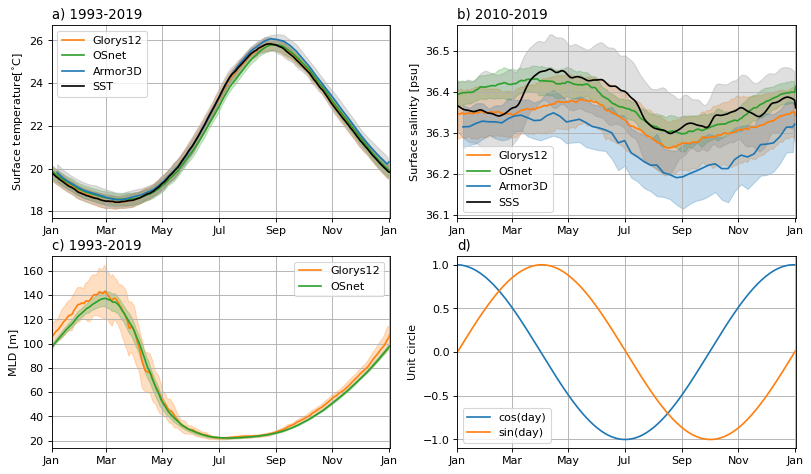

In [5]:
#Plot the MONTHLY MEAN
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,7), dpi=80, facecolor='w', edgecolor='k')
##TEMPERATURE##
Tglorys_mean.plot(label = "Glorys12",ax = ax[0,0],c = 'tab:orange')
ax[0,0].fill_between(datelist, Tglorys_mean+Tglorys_std, Tglorys_mean-Tglorys_std,
    alpha=0.25, edgecolor='tab:orange', facecolor='tab:orange')
Sglorys_mean.plot(label = "Glorys12",ax = ax[0,1],c = 'tab:orange')
ax[0,1].fill_between(datelist, Sglorys_mean+Sglorys_std, Sglorys_mean-Sglorys_std,
    alpha=0.25, edgecolor='tab:orange', facecolor='tab:orange')

Tosnet_mean.plot(label = "OSnet",ax = ax[0,0],c = 'tab:green')
ax[0,0].fill_between(datelist, Tosnet_mean+Tosnet_std, Tosnet_mean-Tosnet_std,
    alpha=0.25, edgecolor='tab:green', facecolor='tab:green')
Sosnet_mean.plot(label = "OSnet",ax = ax[0,1],c = 'tab:green')
ax[0,1].fill_between(datelist, Sosnet_mean+Sosnet_std, Sosnet_mean-Sosnet_std,
    alpha=0.25, edgecolor='tab:green', facecolor='tab:green')

ax[0,0].plot(week_array,Tarmor_mean,label = "Armor3D",c = 'tab:blue')
ax[0,0].fill_between(week_array, Tarmor_mean+Tarmor_std, Tarmor_mean-Tarmor_std,
    alpha=0.25, edgecolor='grey', facecolor='grey')
ax[0,1].plot(week_array,Sarmor_mean,label = "Armor3D",c = 'tab:blue')
ax[0,1].fill_between(week_array, Sarmor_mean+Sarmor_std, Sarmor_mean-Sarmor_std,
    alpha=0.25, edgecolor='tab:blue', facecolor='tab:blue')

Tsurf_mean.plot(label = "SST",ax = ax[0,0],c = 'black')
ax[0,0].fill_between(datelist, Tsurf_mean+Tsurf_std, Tsurf_mean-Tsurf_std,
    alpha=0.25, edgecolor='grey', facecolor='grey')
Ssurf_mean.plot(label = "SSS",ax = ax[0,1],c = 'black')
ax[0,1].fill_between(datelist, Ssurf_mean+Ssurf_std, Ssurf_mean-Ssurf_std,
    alpha=0.25, edgecolor='grey', facecolor='grey')

##MLD##
mea = glorys.mld_ts.groupby(ds.dayOfYear).mean()
std = glorys.mld_ts.groupby(ds.dayOfYear).std()
mea.plot(label = "Glorys12",ax = ax[1,0],c = 'tab:orange')
ax[1,0].fill_between(datelist, mea+std, mea-std,
    alpha=0.25, edgecolor='tab:orange', facecolor='tab:orange')

mea = osnet.mld_ts.groupby(ds.dayOfYear).mean()
std = osnet.mld_ts.groupby(ds.dayOfYear).std()
mea.plot(label = "OSnet",ax = ax[1,0],c = 'tab:green')
ax[1,0].fill_between(datelist, mea+std, mea-std,
    alpha=0.25, edgecolor='tab:green', facecolor='tab:green')

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[0,0].set_ylabel('Surface temperature[$^{\circ}$C]')
ax[0,1].set_ylabel('Surface salinity [psu]')
ax[1,0].set_ylabel('MLD [m]')

#Cos and Sin
cosd = ds.cos_week.groupby(ds.dayOfYear).mean()
ax[1,1].plot(datelist,cosd,label = "cos(day)")
ds.sin_week.groupby(ds.dayOfYear).mean().plot(label = "sin(day)",ax = ax[1,1])
ax[1,1].legend(loc = 'best')
ax[1,1].set_ylabel('Unit circle')

ax[0,0].set_title('a) 1993-2019',loc = 'left')
ax[0,1].set_title('b) 2010-2019',loc = 'left')
ax[1,0].set_title('c) 1993-2019',loc = 'left')
ax[1,1].set_title('d)',loc = 'left')

for i in np.arange(2):
    for j in np.arange(2):
        ax[i,j].set_xlim([0,366])
        ax[i,j].grid()
        ax[i,j].set_xlabel('')
        ax[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.savefig(pathfig + 'Season_anomaly.png', transparent=False)
plt.show()

In [6]:
week_array = np.array([6,  13,  20,  27,  34,  41,  48,  55,  62,  69,  76,  83,  90,
        97, 104, 111, 118, 125, 132, 139, 146, 153, 160, 167, 174, 181,
       188, 195, 202, 209, 216, 223, 230, 237, 244, 251, 258, 265, 272,
       279, 286, 293, 300, 307, 314, 321, 328, 335, 342, 349, 356, 363, 365])
aa = xr.DataArray(Tsurf_mean.data, dims=['x'])
Tsurf_week = aa.sel(x = week_array)

In [7]:
#Load the T mean seasonal of the unadjusted OSnet
NN_Tseason = xr.open_dataset(f'/home/datawork-lops-bluecloud/osnet/timeserie/NN_unadjusted_season.nc')
NN_Tseason = NN_Tseason.TEMP_predicted
NN_Tseason

<xarray.DataArray 'TEMP_predicted' (dayOfYear: 366)>
array([19.760132, 19.717781, 19.679705, ..., 19.858438, 19.819832, 19.80305 ],
      dtype=float32)
Coordinates:
    PRES_INTERPOLATED  int64 ...
  * dayOfYear          (dayOfYear) int64 1 2 3 4 5 6 ... 361 362 363 364 365 366

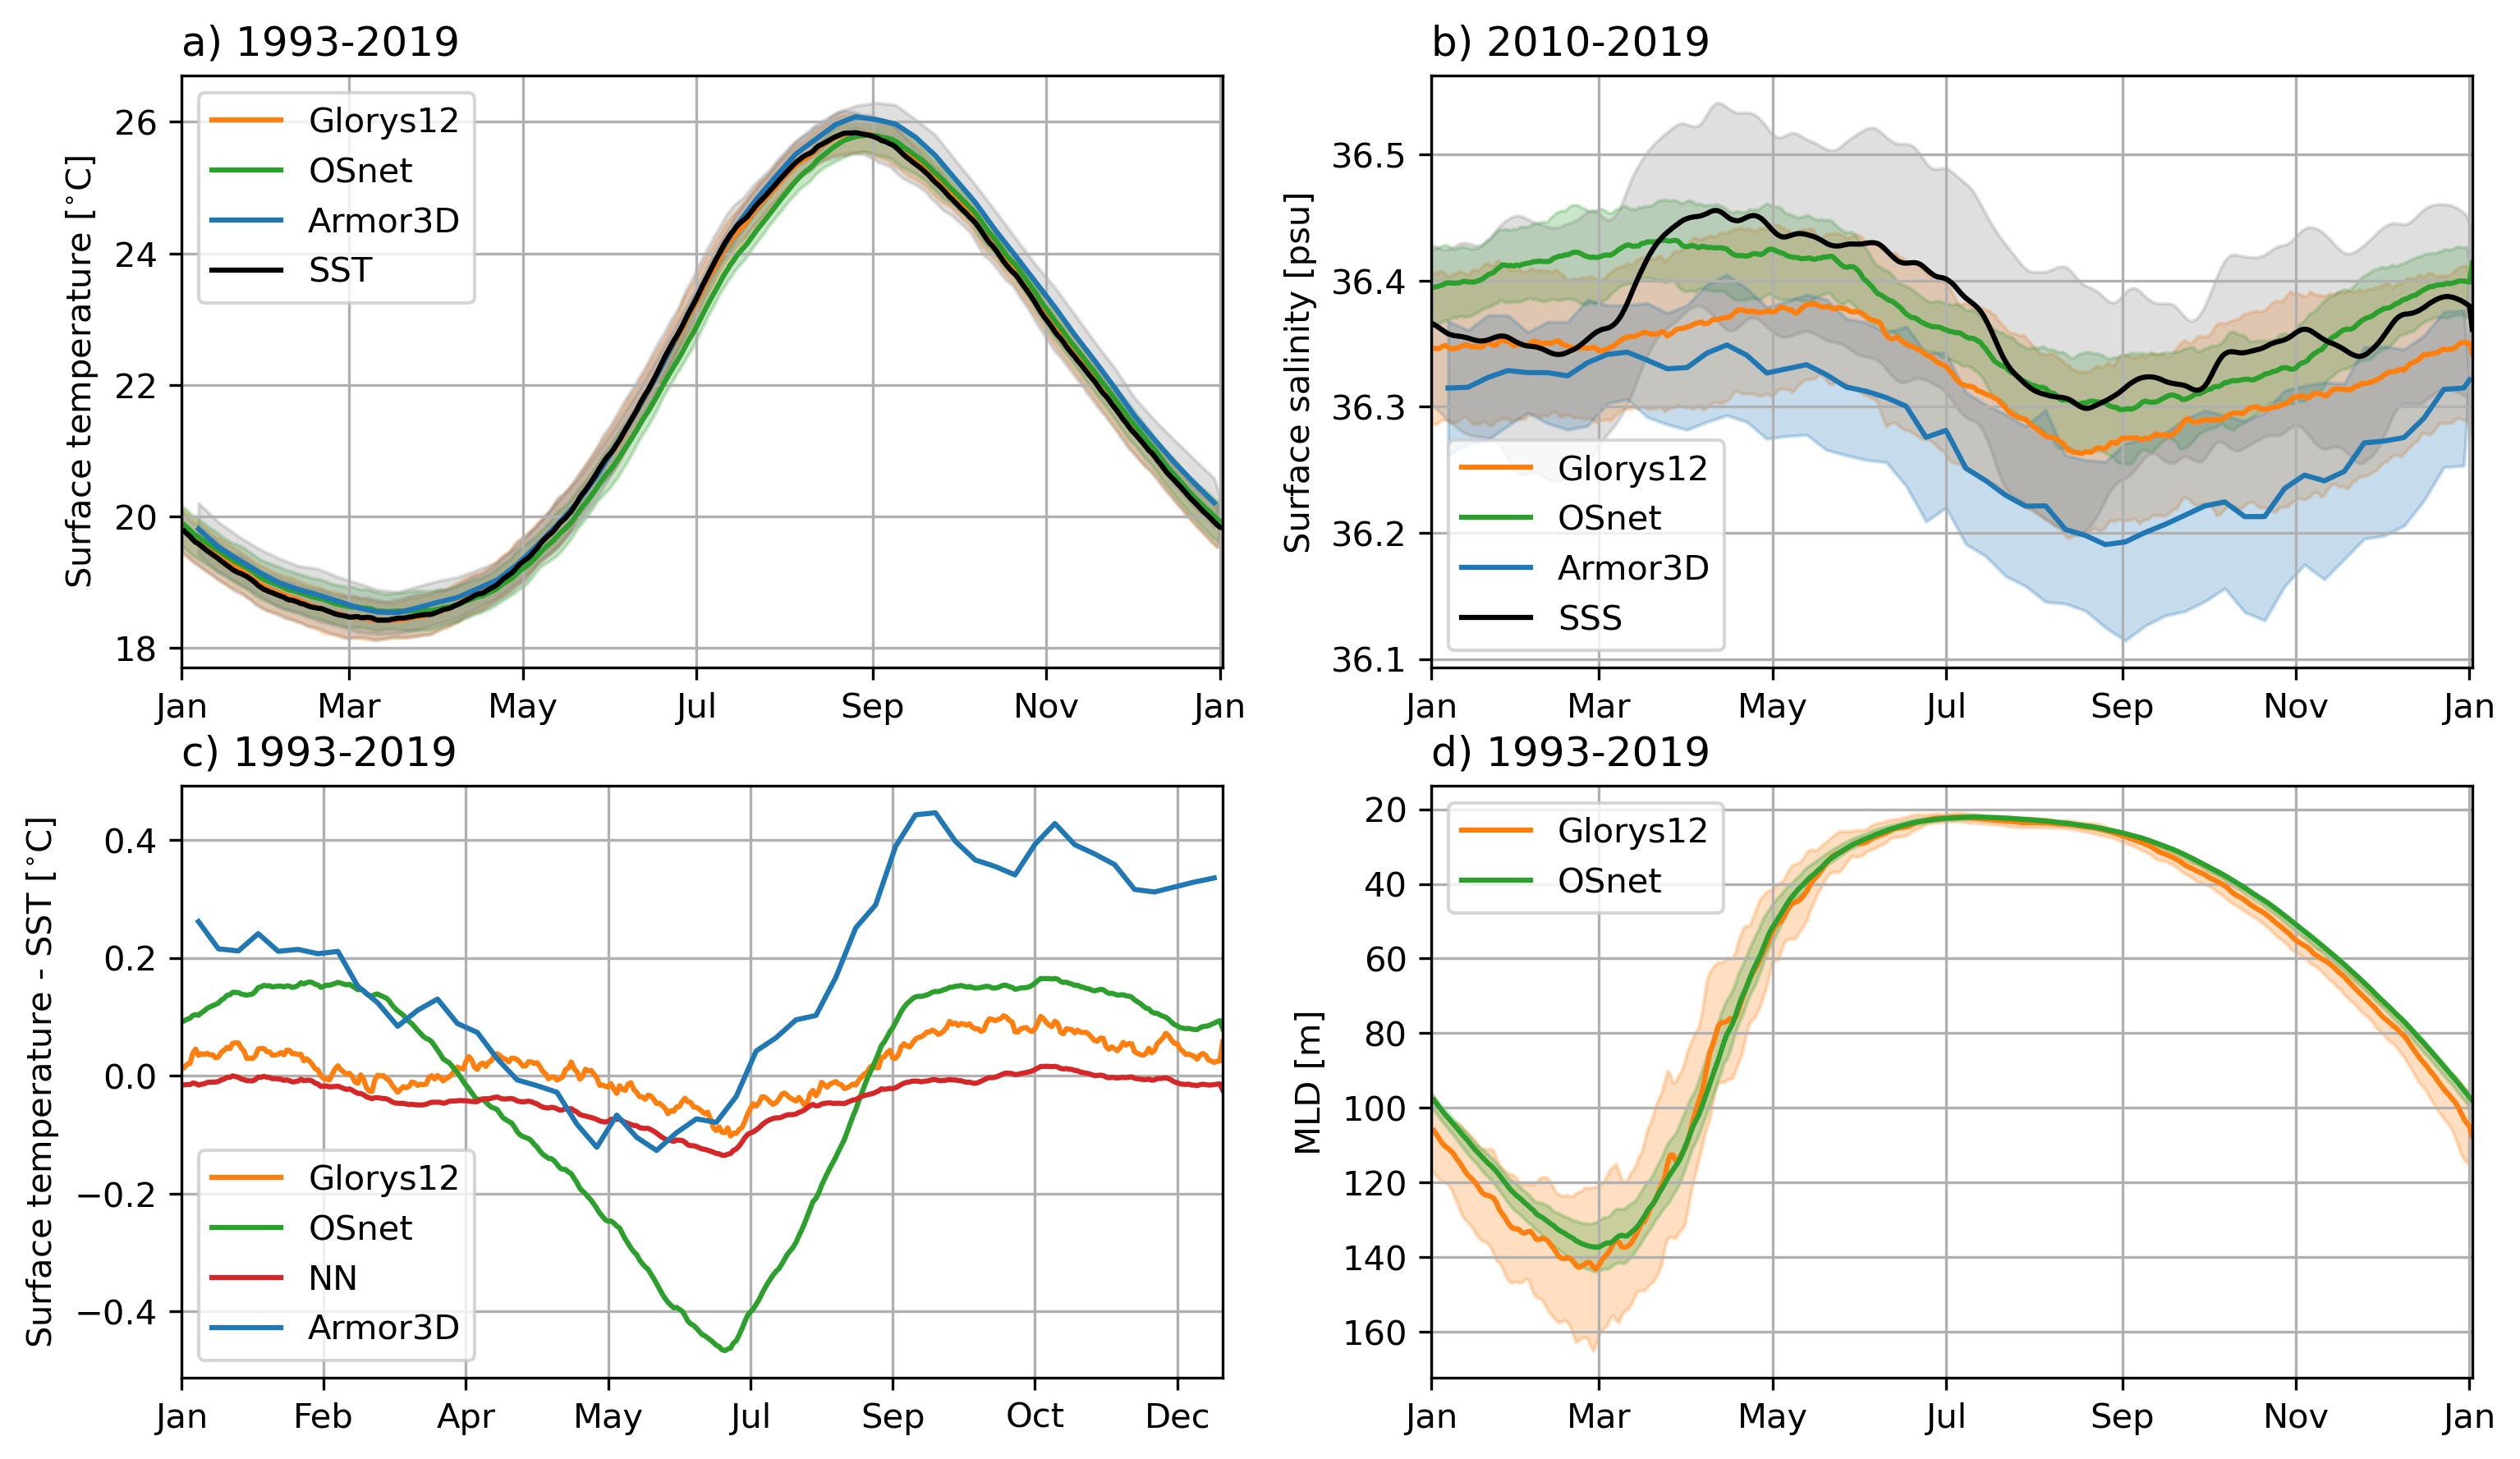

In [10]:
#Plot the MONTHLY MEAN
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,7), dpi=300, facecolor='w', edgecolor='k')
Tglorys_mean.plot(label = "Glorys12",ax = ax[0,0],c = 'tab:orange')
ax[0,0].fill_between(datelist, Tglorys_mean+Tglorys_std, Tglorys_mean-Tglorys_std,
    alpha=0.25, edgecolor='tab:orange', facecolor='tab:orange')
Sglorys_mean.plot(label = "Glorys12",ax = ax[0,1],c = 'tab:orange')
ax[0,1].fill_between(datelist, Sglorys_mean+Sglorys_std, Sglorys_mean-Sglorys_std,
    alpha=0.25, edgecolor='tab:orange', facecolor='tab:orange')
(Tglorys_mean-Tsurf_mean).plot(label = "Glorys12",ax = ax[1,0],c = 'tab:orange')

Tosnet_mean.plot(label = "OSnet",ax = ax[0,0],c = 'tab:green')
ax[0,0].fill_between(datelist, Tosnet_mean+Tosnet_std, Tosnet_mean-Tosnet_std,
    alpha=0.25, edgecolor='tab:green', facecolor='tab:green')
Sosnet_mean.plot(label = "OSnet",ax = ax[0,1],c = 'tab:green')
ax[0,1].fill_between(datelist, Sosnet_mean+Sosnet_std, Sosnet_mean-Sosnet_std,
    alpha=0.25, edgecolor='tab:green', facecolor='tab:green')
(Tosnet_mean-Tsurf_mean).plot(label = "OSnet",ax = ax[1,0],c = 'tab:green')
(NN_Tseason-Tsurf_mean).plot(label = "NN",ax = ax[1,0],c = 'tab:red')
ax[1,0].set_title("")

ax[0,0].plot(week_array[:52],Tarmor_mean[:52],label = "Armor3D",c = 'tab:blue')
ax[0,0].fill_between(week_array, Tarmor_mean+Tarmor_std, Tarmor_mean-Tarmor_std,
    alpha=0.25, edgecolor='grey', facecolor='grey')
ax[0,1].plot(week_array,Sarmor_mean,label = "Armor3D",c = 'tab:blue')
ax[0,1].fill_between(week_array, Sarmor_mean+Sarmor_std, Sarmor_mean-Sarmor_std,
    alpha=0.25, edgecolor='tab:blue', facecolor='tab:blue')
ax[1,0].plot(week_array[:52],(Tarmor_mean.data - Tsurf_week.data)[:52],label = "Armor3D",c = 'tab:blue')

Tsurf_mean.plot(label = "SST",ax = ax[0,0],c = 'black')
ax[0,0].fill_between(datelist, Tsurf_mean+Tsurf_std, Tsurf_mean-Tsurf_std,
    alpha=0.25, edgecolor='grey', facecolor='grey')
Ssurf_mean.plot(label = "SSS",ax = ax[0,1],c = 'black')
ax[0,1].fill_between(datelist, Ssurf_mean+Ssurf_std, Ssurf_mean-Ssurf_std,
    alpha=0.25, edgecolor='grey', facecolor='grey')

##MLD##
mea = glorys.mld_ts.groupby(ds.dayOfYear).mean()
std = glorys.mld_ts.groupby(ds.dayOfYear).std()
mea.plot(label = "Glorys12",ax = ax[1,1],c = 'tab:orange',yincrease = False)
ax[1,1].fill_between(datelist, mea+std, mea-std,
    alpha=0.25, edgecolor='tab:orange', facecolor='tab:orange')

mea = osnet.mld_ts.groupby(ds.dayOfYear).mean()
std = osnet.mld_ts.groupby(ds.dayOfYear).std()
mea.plot(label = "OSnet",ax = ax[1,1],c = 'tab:green')
ax[1,1].fill_between(datelist, mea+std, mea-std,
    alpha=0.25, edgecolor='tab:green', facecolor='tab:green')

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[0,0].set_ylabel('Surface temperature [$^{\circ}$C]')
ax[0,1].set_ylabel('Surface salinity [psu]')
ax[1,0].set_ylabel('Surface temperature - SST [$^{\circ}$C]')
ax[1,1].set_ylabel('MLD [m]')


ax[0,0].set_title('a) 1993-2019',loc = 'left')
ax[0,1].set_title('b) 2010-2019',loc = 'left')
ax[1,0].set_title('c) 1993-2019',loc = 'left')
ax[1,1].set_title('d) 1993-2019',loc = 'left')

for i in np.arange(2):
    for j in np.arange(2):
        ax[i,j].set_xlim([0,366])
        ax[i,j].grid()
        ax[i,j].set_xlabel('')
        ax[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.savefig(pathfig + 'Final_Figure/Season_ano.png', transparent=False)
plt.show()

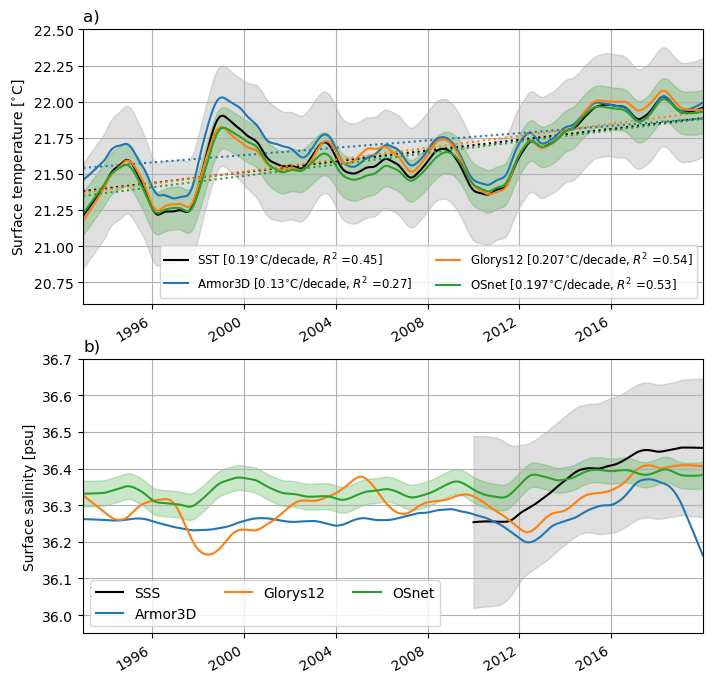

In [45]:
time = pd.to_datetime(surf.time)
time_SSS = pd.to_datetime(surf.time_SSS)
#Combine all the trends for a figure final SST and SSS only
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8), dpi=100, facecolor='w', edgecolor='k')
#SST TREND#
ax[0].fill_between(time, surf.SST_trend + surf.SSTerr_trend, surf.SST_trend- surf.SSTerr_trend, #label = 'SST mapping uncertainty',
    alpha=0.25, edgecolor='grey', facecolor='grey')
x = np.arange(len(time))
y = surf.SST_trend
m,b = np.polyfit(x, y, 1)
ypred = m*x + b
SSres =  np.sum((y-ypred)**2)
SStot = np.sum((y-np.mean(y))**2)
R2= 1- SSres / SStot
surf.SST_trend.plot(label = "SST ["+ str(np.around(m*365*10,2))+"$^{\circ}$C/decade, $R^{2}$ ="+str(np.around(R2.data,2))+"]",color = 'k',ax = ax[0])
ax[0].plot(time, m*x + b,linestyle = 'dotted',color = 'k')

x = np.arange(len(armor.time))
y = armor.to_trend
m,b = np.polyfit(x, y, 1)
ypred = m*x + b
SSres =  np.sum((y-ypred)**2)
SStot = np.sum((y-np.mean(y))**2)
R2= 1- SSres / SStot
armor.to_trend.plot(label = "Armor3D ["+ str(np.around(m*52*10,2))+"$^{\circ}$C/decade, $R^{2}$ ="+str(np.around(R2.data,2))+"]",color = 'tab:blue',ax = ax[0])
ax[0].plot(armor.time, m*x + b,linestyle = 'dotted',color = 'tab:blue')

x = np.arange(len(glorys.to_trend))
y = glorys.to_trend
m,b = np.polyfit(x, y, 1)
ypred = m*x + b
SSres =  np.sum((y-ypred)**2)
SStot = np.sum((y-np.mean(y))**2)
R2= 1- SSres / SStot
glorys.to_trend.plot(label = "Glorys12 ["+ str(np.around(m*365*10,3))+"$^{\circ}$C/decade, $R^{2}$ ="+str(np.around(R2.data,2))+"]",color = 'tab:orange',ax = ax[0])
ax[0].plot(glorys.time, m*x + b,linestyle = 'dotted',color = 'tab:orange')

x = np.arange(len(osnet.to_trend))
y = osnet.to_trend
m,b = np.polyfit(x, y, 1)
ypred = m*x + b
SSres =  np.sum((y-ypred)**2)
SStot = np.sum((y-np.mean(y))**2)
R2= 1- SSres / SStot
osnet.to_trend.plot(label = "OSnet ["+ str(np.around(m*365*10,3))+"$^{\circ}$C/decade, $R^{2}$ ="+str(np.around(R2.data,2))+"]",color = 'tab:green',ax = ax[0])
ax[0].plot(osnet.time, m*x + b,linestyle = 'dotted',color = 'tab:green')
ax[0].fill_between(time, osnet.to_trend + osnet.tCI_trend, osnet.to_trend- osnet.tCI_trend, #label = 'OSnet confidence interval',
    alpha=0.25, edgecolor='tab:green', facecolor='tab:green')

ax[0].set_ylim([20.6,22.5])
ax[0].legend(ncol=2,loc = 'lower right',fontsize = 8.5)
ax[0].set_ylabel('Surface temperature [$^{\circ}$C]')
ax[0].set_xlim([time[0],time[-1]])
ax[0].grid()
ax[0].set_xlabel('')
ax[0].set_title("a)",loc = 'left')

surf.SSS_trend.plot(ax = ax[1],label = 'SSS',color = 'k')
ax[1].fill_between(time_SSS, surf.SSS_trend + surf.SSSerr_trend, surf.SSS_trend- surf.SSSerr_trend, #label = 'SSS random error',
    alpha=0.25, edgecolor='grey', facecolor='grey')
armor.so_trend.plot(ax = ax[1],label = "Armor3D")
glorys.so_trend.plot(ax = ax[1],label = "Glorys12")
osnet.so_trend.plot(ax = ax[1],label = "OSnet")
ax[1].fill_between(time, osnet.so_trend + osnet.sCI_trend, osnet.so_trend- osnet.sCI_trend, #label = 'OSnet confidence interval',
    alpha=0.25, edgecolor='tab:green', facecolor='tab:green')
ax[1].set_ylim([35.95,36.7])
ax[1].set_xlim([time[0],time[-1]])
ax[1].legend(ncol=3,loc = 'lower left')
ax[1].set_ylabel('Surface salinity [psu]')
ax[1].grid()
ax[1].set_xlabel('')
ax[1].set_title("b)",loc = 'left')

plt.savefig(pathfig + 'Timeserie_Surface.png', transparent=False)
plt.show()

In [29]:
#R2 SST
x = np.arange(len(time))
y = surf.SST_trend
m,b = np.polyfit(x, y, 1)
ypred = m*x + b
SSres =  np.sum((y-ypred)**2)
SStot = np.sum((y-np.mean(y))**2)
R2= 1- SSres / SStot
R2

<xarray.DataArray 'SST_trend' ()>
array(0.44539334)

In [30]:
#R2 Armor3D
x = np.arange(len(armor.time))
y = armor.to_trend
m,b = np.polyfit(x, y, 1)
ypred = m*x + b

SSres =  np.sum((y-ypred)**2)
SStot = np.sum((y-np.mean(y))**2)
R2= 1- SSres / SStot
R2

<xarray.DataArray 'to_trend' ()>
array(0.27109693)

In [34]:
#R2 glorys
x = np.arange(len(glorys.to_trend))
y = glorys.to_trend
m,b = np.polyfit(x, y, 1)
ypred = m*x + b

SSres =  np.sum((y-ypred)**2)
SStot = np.sum((y-np.mean(y))**2)
R2= 1- SSres / SStot
R2

<xarray.DataArray 'to_trend' ()>
array(0.53873515)

In [33]:
#R2 Osnet
x = np.arange(len(osnet.to_trend))
y = osnet.to_trend
m,b = np.polyfit(x, y, 1)
ypred = m*x + b

SSres =  np.sum((y-ypred)**2)
SStot = np.sum((y-np.mean(y))**2)
R2= 1- SSres / SStot
R2

<xarray.DataArray 'to_trend' ()>
array(0.52538049)

In [ ]:
#Combine all the trends for a figure final SST and SSS only
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8), dpi=100, facecolor='w', edgecolor='k')
#SST TREND#
ax[0].fill_between(time, surf.SST_trend + surf.SSTerr_trend, surf.SST_trend- surf.SSTerr_trend, #label = 'SST mapping uncertainty',
    alpha=0.25, edgecolor='grey', facecolor='grey')
x = np.arange(len(time))
y = surf.SST_trend
m,b = np.polyfit(x, y, 1)
surf.SST_trend.plot(label = "SST ["+ str(np.around(m*365*10,2))+"$^{\circ}$C/decade]",color = 'k',ax = ax[0])
ax[0].plot(time, m*x + b,linestyle = 'dotted',color = 'k')

x = np.arange(len(armor.time))
y = armor.to_trend
m,b = np.polyfit(x, y, 1)
armor.to_trend.plot(label = "Armor3D ["+ str(np.around(m*52*10,2))+"$^{\circ}$C/decade]",color = 'tab:blue',ax = ax[0])
ax[0].plot(armor.time, m*x + b,linestyle = 'dotted',color = 'tab:blue')

x = np.arange(len(glorys.to_trend))
y = glorys.to_trend
m,b = np.polyfit(x, y, 1)
glorys.to_trend.plot(label = "Glorys12 ["+ str(np.around(m*365*10,3))+"$^{\circ}$C/decade]",color = 'tab:orange',ax = ax[0])
ax[0].plot(glorys.time, m*x + b,linestyle = 'dotted',color = 'tab:orange')

x = np.arange(len(osnet.to_trend))
y = osnet.to_trend
m,b = np.polyfit(x, y, 1)
osnet.to_trend.plot(label = "OSnet ["+ str(np.around(m*365*10,3))+"$^{\circ}$C/decade]",color = 'tab:green',ax = ax[0])
ax[0].plot(osnet.time, m*x + b,linestyle = 'dotted',color = 'tab:green')
ax[0].fill_between(time, osnet.to_trend + osnet.tCI_trend, osnet.to_trend- osnet.tCI_trend, #label = 'OSnet confidence interval',
    alpha=0.25, edgecolor='tab:green', facecolor='tab:green')

ax[0].set_ylim([20.6,22.5])
ax[0].legend(ncol=2,loc = 'lower right')
ax[0].set_ylabel('Surface temperature [$^{\circ}$C]')
ax[0].set_xlim([time[0],time[-1]])
ax[0].grid()
ax[0].set_xlabel('')
ax[0].set_title("a)",loc = 'left')

#SSS
x = np.arange(len(time_SSS))
y = surf.SSS_trend
m,b = np.polyfit(x, y, 1)
surf.SSS_trend.plot(label = "SSS ["+ str(np.around(m*365*10,2))+"psu/decade]",color = 'k',ax = ax[1])
ax[1].plot(time_SSS, m*x + b,linestyle = 'dotted',color = 'k')
ax[1].fill_between(time_SSS, surf.SSS_trend + surf.SSSerr_trend, surf.SSS_trend- surf.SSSerr_trend, #label = 'SSS random error',
    alpha=0.25, edgecolor='grey', facecolor='grey')

x = np.arange(len(armor.time))
y = armor.so_trend
m,b = np.polyfit(x, y, 1)
armor.so_trend.plot(label = "Armor3D ["+ str(np.around(m*52*10,2))+"psu/decade]",color = 'tab:blue',ax = ax[1])
ax[1].plot(armor.time, m*x + b,linestyle = 'dotted',color = 'tab:blue')

x = np.arange(len(glorys.so_trend))
y = glorys.so_trend
m,b = np.polyfit(x, y, 1)
glorys.so_trend.plot(label = "Glorys12 ["+ str(np.around(m*365*10,3))+"psu/decade]",color = 'tab:orange',ax = ax[1])
ax[1].plot(glorys.time, m*x + b,linestyle = 'dotted',color = 'tab:orange')

x = np.arange(len(osnet.so_trend))
y = osnet.so_trend
m,b = np.polyfit(x, y, 1)
osnet.so_trend.plot(label = "OSnet ["+ str(np.around(m*365*10,3))+"psu/decade]",color = 'tab:green',ax = ax[1])
ax[1].fill_between(time, osnet.so_trend + osnet.sCI_trend, osnet.so_trend- osnet.sCI_trend, #label = 'OSnet confidence interval',
    alpha=0.25, edgecolor='tab:green', facecolor='tab:green')
ax[1].plot(osnet.time, m*x + b,linestyle = 'dotted',color = 'tab:green')

ax[1].set_ylim([35.95,36.7])
ax[1].set_xlim([time[0],time[-1]])
ax[1].legend(ncol=3,loc = 'lower left')
ax[1].set_ylabel('Surface salinity [psu]')
ax[1].grid()
ax[1].set_xlabel('')
ax[1].set_title("b)",loc = 'left')

plt.savefig(pathfig + 'Timeserie_Surface_trends.png', transparent=False)
plt.show()

In [ ]:
surf

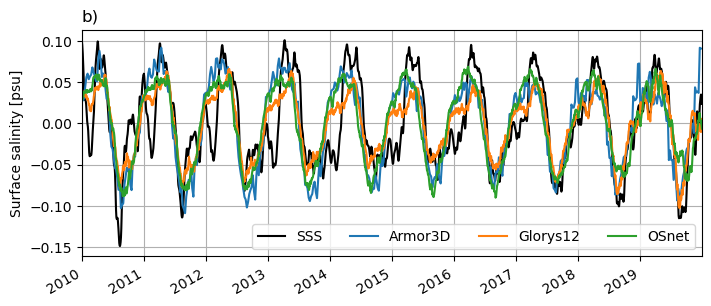

In [33]:
#Plot SSS periodic signal for 2010-2019
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,3), dpi=100, facecolor='w', edgecolor='k')

#SSS

surf.SSS_season.plot(label = "SSS",color = 'k',ax = ax)
#ax.fill_between(time_SSS, surf.SSS_season + surf.SSSerr_season, surf.SSS_season- surf.SSSerr_season, #label = 'SSS random error',
#    alpha=0.25, edgecolor='grey', facecolor='grey')

armor.so_season.plot(label = "Armor3D",color = 'tab:blue',ax = ax)
glorys.so_season.plot(label = "Glorys12",color = 'tab:orange',ax = ax)
osnet.so_season.plot(label = "OSnet",color = 'tab:green',ax = ax)

#ax[1].set_ylim([35.95,36.7])
ax.set_xlim('2010-01-01','2019-12-31')
ax.legend(ncol=4,loc = 'lower right')
ax.set_ylabel('Surface salinity [psu]')
ax.grid()
ax.set_xlabel('')
ax.set_title("b)",loc = 'left')

plt.savefig(pathfig + 'SSS_periodic.png', transparent=False)
plt.show()

In [24]:
#Monthly average with specific periods
day = np.array(pd.DatetimeIndex(surf['time_SSS'].data).dayofyear).astype(np.int32)
surf = surf.assign(variables={"dayOfYear_SSS": (('time_SSS'), day)})
Ssurf_mean = surf.SSS_ts.groupby(surf.dayOfYear_SSS).mean()

sur = surf.sel(time_SSS = slice('2016-01-01','2019-12-31'))
Ssur_mean = sur.SSS_ts.groupby(sur.dayOfYear_SSS).mean()